# Start Here - Twin Paradox tutorial

To show what SpacetimeLib can do, let's look at a well-known thought experiment called the [twin paradox](https://en.wikipedia.org/wiki/Twin_paradox).

Alice and Bob are twins living on Earth. Alice gets on a spaceship, travels 10 light years away from Earth, and then comes right back. Her ship can travel extremely fast, but not as fast as light. From Bob's perspective, each leg of Alice's trip takes 10.1 years, and when Alice arrives back home, Bob has aged 20.2 years. How much time does the trip take from Alice's perspective?

If you haven't learned about special relativity and [time dilation](https://en.wikipedia.org/wiki/Time_dilation) before, you may be tempted to say that the trip takes 20.2 years from Alice's perspective as well, because time passes at the same rate for everyone. However, special relativity teaches us that time actually passes at different rates for two people traveling at different velocities. Let's get more into it.

In [1]:
import spacetimelib as st

## Creating worldlines

SpacetimeLib has an object called `spacetimelib.Worldline` to represent the [worldline](https://en.wikipedia.org/wiki/World_line) (a trajectory through spacetime) of a particle. We give it a list of events that a particle travels through, and SpacetimeLib will draw straight lines through those points to create a trajectory.

An event is just a point in spacetime, so it contains a time and a spatial position.

Alice and Bob both start at the same event `(t=0, x=0)`. Halfway through her trip, Alice is at the event `(t=10.1, x=10)`. Then at the end of her trip, both Alice and Bob are at the event `(t=20.2, x=0)`. Let's create the worldlines for Alice and Bob.

In [2]:
alice_0 = st.Worldline([
    # (t, x)
    (0, 0),
    (10.1, 10),
    (20.2, 0)
])

bob_0 = st.Worldline([
    (0, 0),
    (20.2, 0)
])

I put `_0` on these variable names to keep track of which reference frame we used for the coordinates of the worldlines. `_0` will refer to Bob's reference frame.

## Proper time along worldlines

Finding the answer to the question, "How much time does the trip take from Alice's perspective?", is easy. We can just call `Worldline.proper_time_delta()` to find the [proper time](https://en.wikipedia.org/wiki/Proper_time) along a worldline between two time coordinates.

Let's first find Bob's proper time over the course of Alice's journey.

In [3]:
bob_0.proper_time_delta(0, 20.2)

20.2

Exactly as we expected, the trip takes 20.2 years from Bob's perspective. What about Alice's proper time?

In [4]:
alice_0.proper_time_delta(0, 20.2)

2.8354893757515587

From Alice's perspective, her trip only takes 2.84 years. This means that when Alice arrives back home, she will have aged only 2.84 years, while Bob will have aged 20.2 years. Bob will be more than 17 years older than Alice, even though they both started out at the same age before Alice went on her trip.

This time dilation effect becomes even greater if Alice has a faster spaceship. For instance, what if she could complete each 10 lightyear leg in 10.00001 years from Bob's perspective?

In [5]:
w = st.Worldline([
    (0, 0),
    (10.00001, 10),
    (20.00002, 20)
])
years = w.proper_time_delta(0, 20.00002)
years

0.02828427831811963

In [6]:
days = 365 * years
days

10.323761586113665

Traveling at this faster speed, Alice only experiences 10.32 days, while Bob experiences slightly more than 20 years.

Imagine this: Right before Alice starts her journey, Alice and Bob celebrate their 18th birthday, and they also welcome Bob's newborn daughter into the world. When Alice arrives back home after her trip, it is her niece's 20th birthday and Bob's 38th birthday, while Alice is only 18 years and 10 days old.

## Plotting

We can plot worldlines with [Matplotlib](https://matplotlib.org/). Obtaining plottable data from worldlines is easy, with `Worldline.plot()`. If you're not familiar with Matplotlib, don't worry about understanding how it works right now. There are [tutorials](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) for it, which you can check out later.

In [7]:
import matplotlib.pyplot as plt

def plot_worldline(ax, w, label):
    out = ax.plot(*w.plot(), label=label, marker='.')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('t-axis')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return out

(0.0, 22.0)

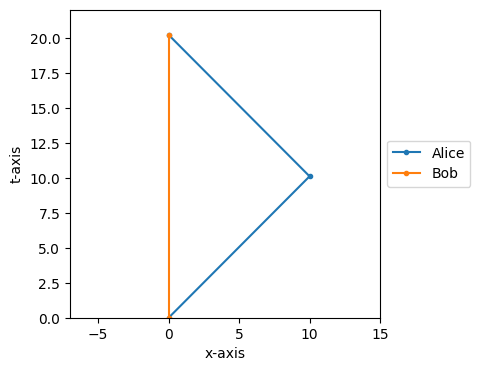

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

plot_worldline(ax, alice_0, "Alice")
plot_worldline(ax, bob_0, "Bob")

ax.set_xlim(-7, 15)
ax.set_ylim(0, 22)

## Velocity along a worldline

Another thing we can do with these worldlines is calculate the velocity of Alice and Bob at different points in time with `Worldline.eval_vel_s()`. What is Alice's velocity at, say time `t = 5`? This is during the first leg of her journey, so we'd expect the velocity to be positive, since she is moving in the positive x-direction. As for the magnitude, each leg is 10 lightyears long and takes 10.1 years, so we'd expect it to be `distance / time = 10 / 10.1`, which is:

In [9]:
10 / 10.1

0.9900990099009901

Let's see what SpacetimeLib gives.

In [10]:
first_leg_vel_0 = alice_0.eval_vel_s(5)
first_leg_vel_0

array([0.99009901])

That's what we expected. What about the other leg? Let's check `t = 15`.

In [11]:
second_leg_vel_0 = alice_0.eval_vel_s(15)
second_leg_vel_0

array([-0.99009901])

The magnitude is the same, but the direction is opposite, since this is during the second leg and Alice is traveling back to Earth.

## Viewing from a different reference frame

Currently, we've only been viewing Alice and Bob's worldlines from Bob's reference frame. But we can apply a [Lorentz transformation](https://en.wikipedia.org/wiki/Lorentz_transformation) to view the same worldlines from a different reference frame that is moving at a different velocity relative to the original reference frame. This process is called "boosting", and we can use `Worldline.boost()` to do it.

Let's view the worldlines from Alice's perspective during the first leg of her trip.

In [12]:
alice_1 = alice_0.boost(first_leg_vel_0)
bob_1 = bob_0.boost(first_leg_vel_0)

I named these variables with `_1` to refer to Alice's reference frame during the first leg of her journey. Let's plot these boosted worldlines.

(0.0, 10.0)

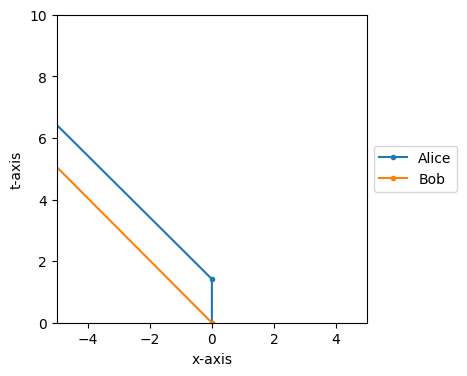

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

plot_worldline(ax, alice_1, "Alice")
plot_worldline(ax, bob_1, "Bob")

ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)